In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import plotly.express as px

In [2]:
#Read the dataset
data_df = pd.read_csv("../data/churn.csv")

In [3]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data_df.shape[0]

7043

The dataset is composed of 21 columns and 7043 instances

The data fall under two categories:
- 17 Categorical features:
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependent: Whether the customer has dependents or not (Yes, No)
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
***
    
- 3 Numerical features:

    - Tenure: Number of months the customer has stayed with the company 
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
      
***

- Prediction feature:
    - Churn: Whether the customer churned or not (Yes or No)
    
    
These features can also be sub-divided into:

- Demographic customer information

    - gender , SeniorCitizen , Partner , Dependents

- Services that each customer has signed up for

    - PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies, 
    
- Customer account information

    - tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### Explore Target variable

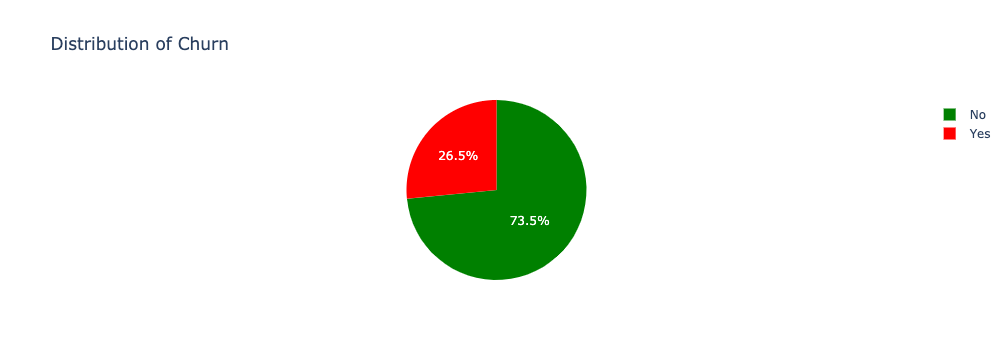

In [9]:
target_instance = data_df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

We are trying to predict users that left the company in the previous month. It is a binary classification problem with an unbalance target.
- Churn: No - 73.5%
- Churn: Yes - 26.5%

### Explore Categorical features

In [10]:
def bar(feature):
    temp_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution
    value_counts_df = data_df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
#     cat_str = ' '.join([str(elem) for elem in categories])
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    sum_value = sum(num_list)
    div_list = [element / sum_value for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    
    #Defining formatting string
    def num_format(list_instance):
        length = len(list_instance)
        formatted_str = ''
        for (index, num) in enumerate(list_instance):
            if index < length-2:
                formatted_str=formatted_str+f"{num}%, "
            elif index ==length-2:
                formatted_str=formatted_str+f"{num}% & "
            else:
                formatted_str=formatted_str+f"{num}%"             
        return formatted_str
    
    def str_format(list_instance):
        length = len(list_instance)
        formatted_str = ''
        for (index, num) in enumerate(list_instance):
            if index < length-2:
                formatted_str=formatted_str+f"{num}, "
            elif index ==length-2:
                formatted_str=formatted_str+f"{num} & "
            else:
                formatted_str=formatted_str+f"{num}"         
        return formatted_str
        
    
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
     text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
    return (fig.show())

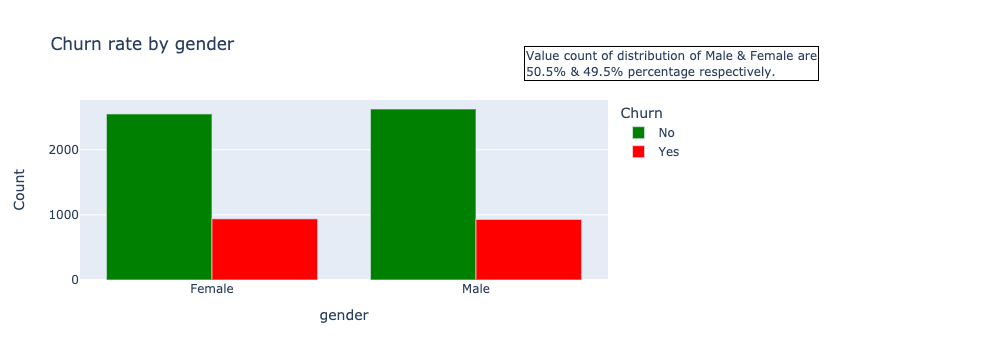

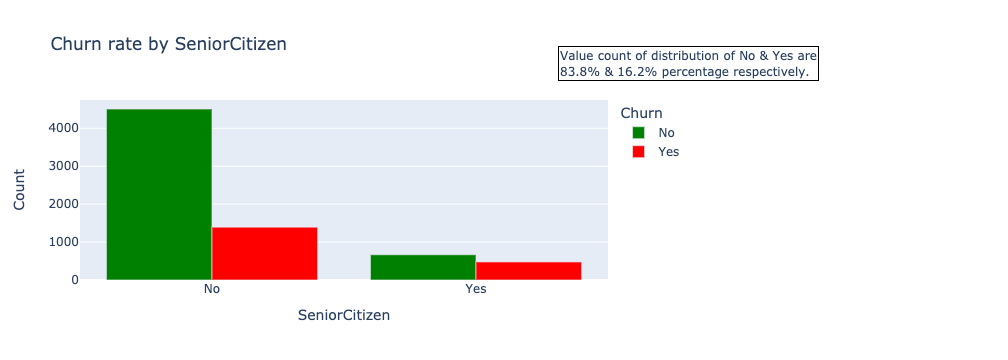

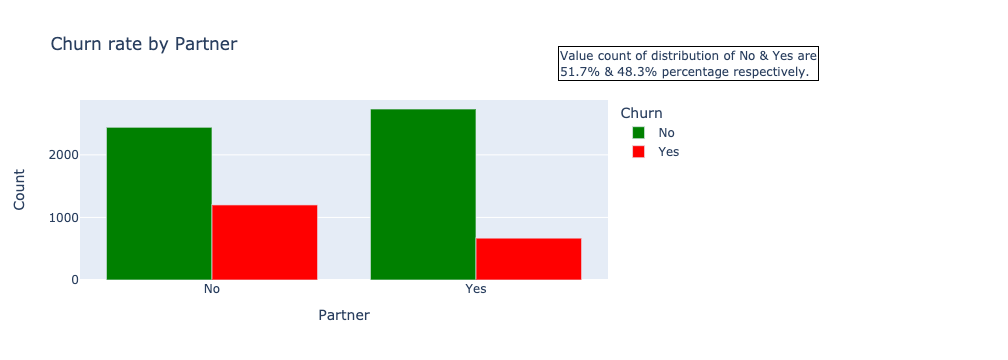

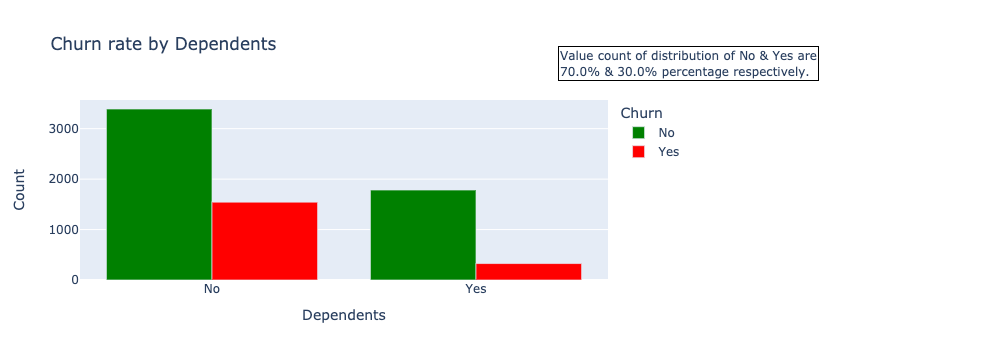

In [11]:
#Gender
bar('gender')
#Senior Citizen
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No" 
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
bar('SeniorCitizen')
#Partner
bar('Partner')
#Dependents
bar('Dependents')

**Demographic analysis**: The distribution of gender and partner are even distributed with approxiamate percentages. emale customers are more likely to churn than male customers, but the difference is minimal. There is a higher proportion of churn amongst younger citizen, customers with no Partners and customers with no dependents. The distribution show that most of the customers are younger people and have no dependents.  Non-senior citizens with no partners and dependents describe a particular segment of customers that are likely to churn. About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

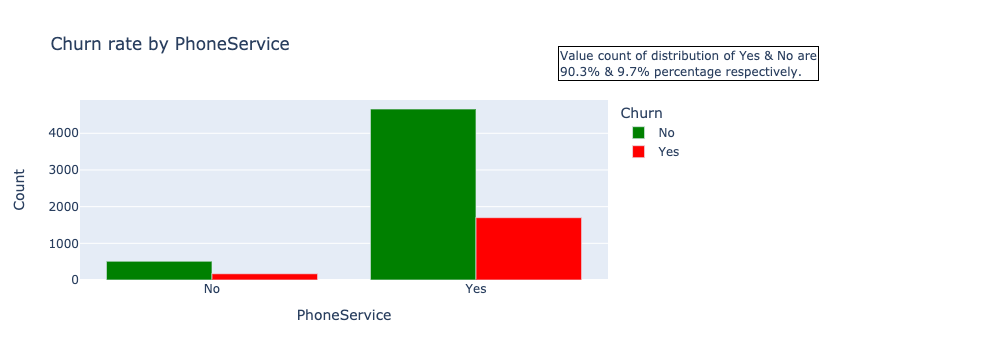

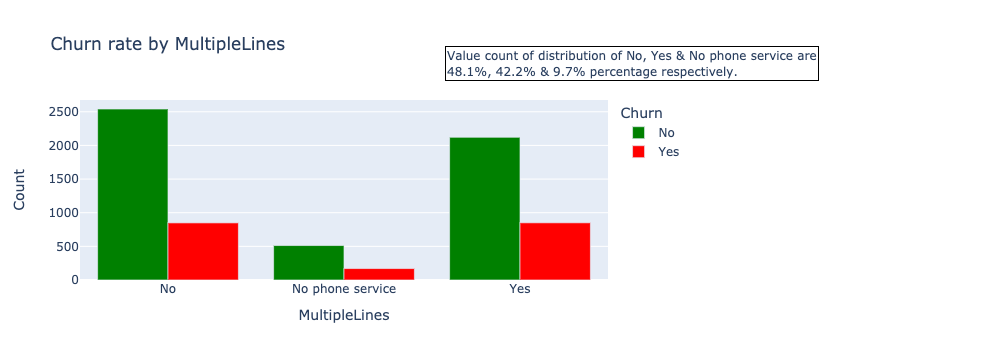

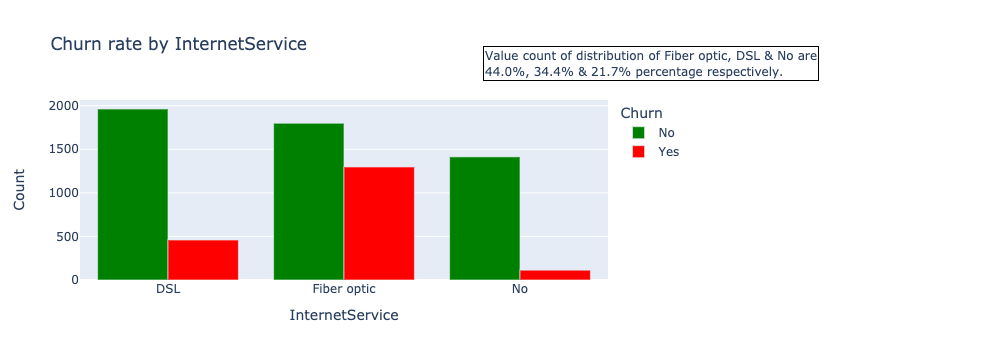

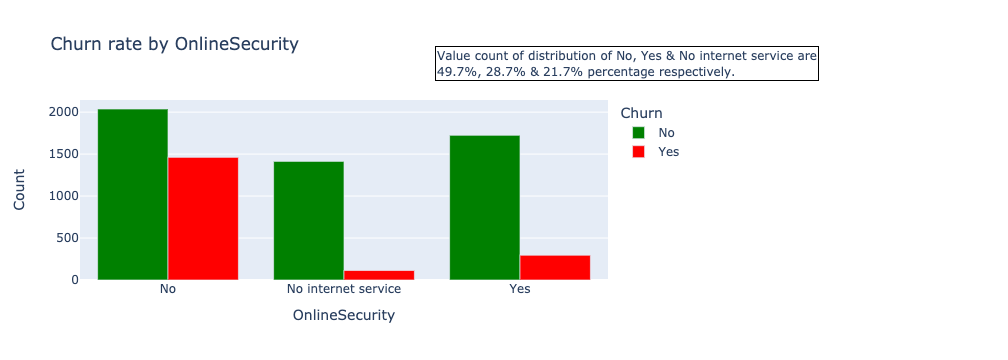

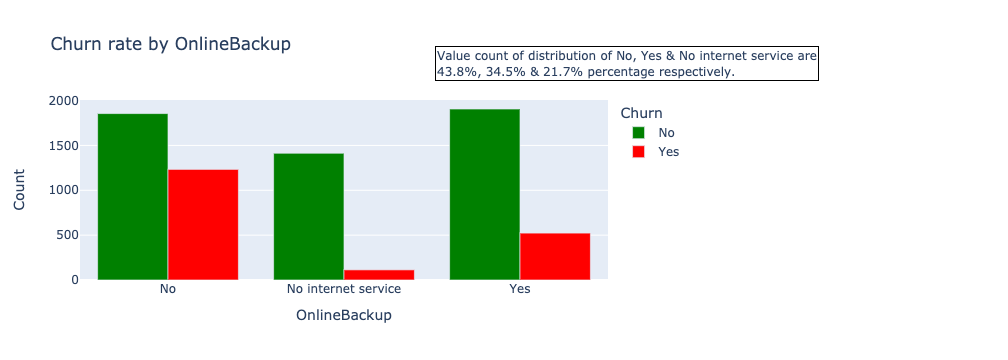

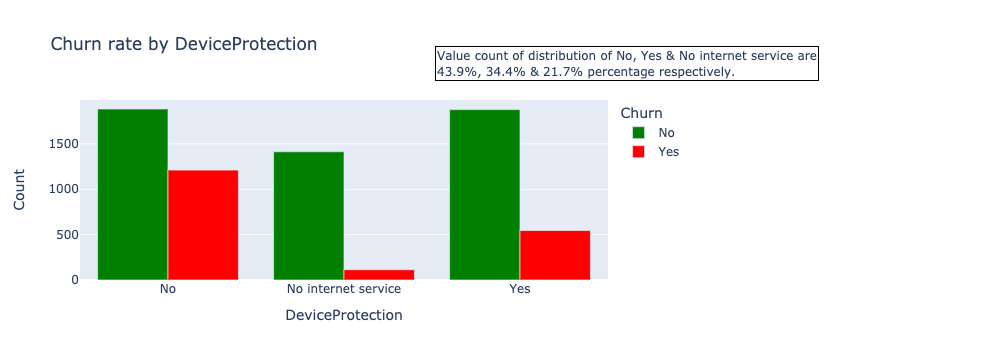

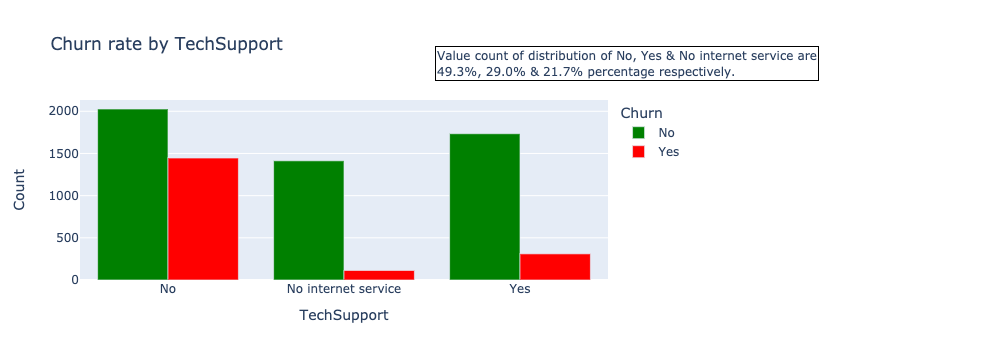

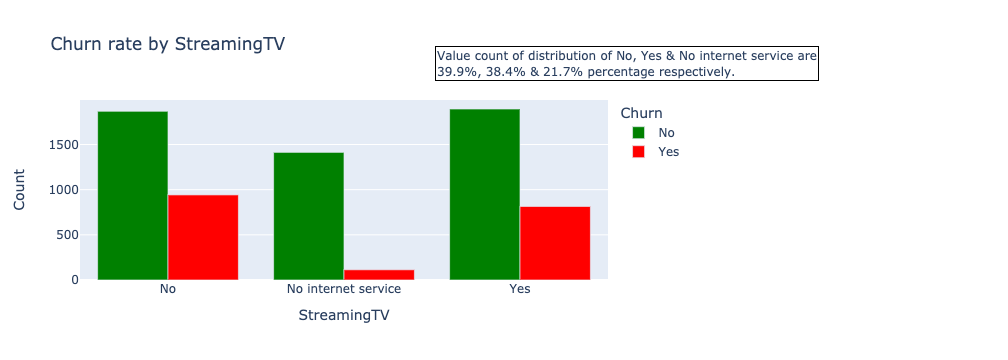

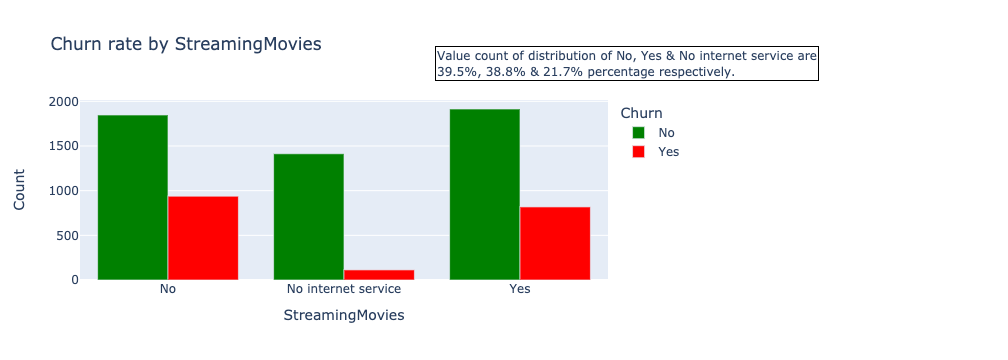

In [12]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

**Services that each customer has signed up for**: These features show significant difference across their values. About 90.3% of the customers have phone services and have the higher rate to churn. The multipleLine is slightly evenly distributed with customers who have multiple lines or not, hence deduction can't be made clearly. Customers who have Fibre optic as internet service are more likely to churn, this can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn. Customers with  OnlineSecurity ,OnlineBackup ,DeviceProtection and TechSupport  are more unlikely to churn. Streaming service is not predictive for churn as it evenly distributed to yes and no options. If a customer does not have a phone service, he/she cannot have multiple lines. 

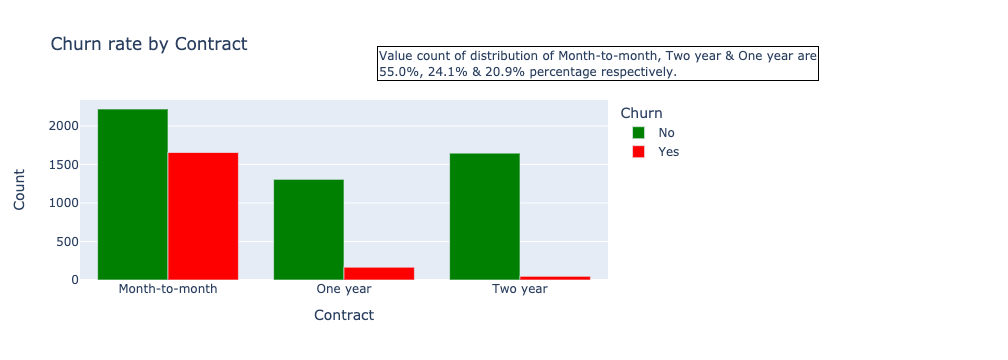

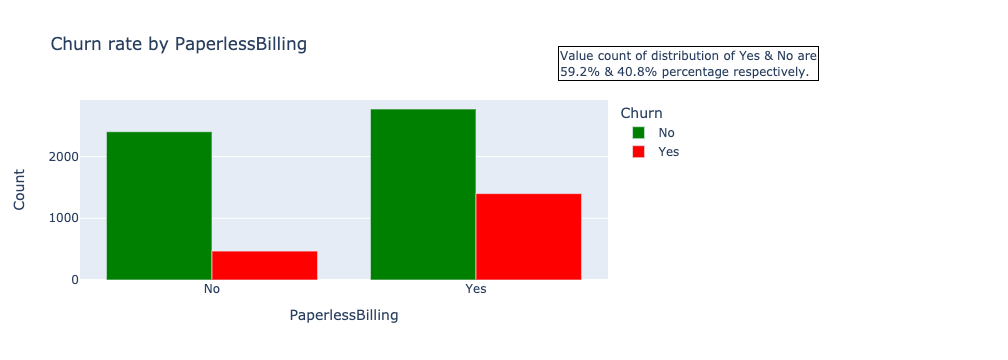

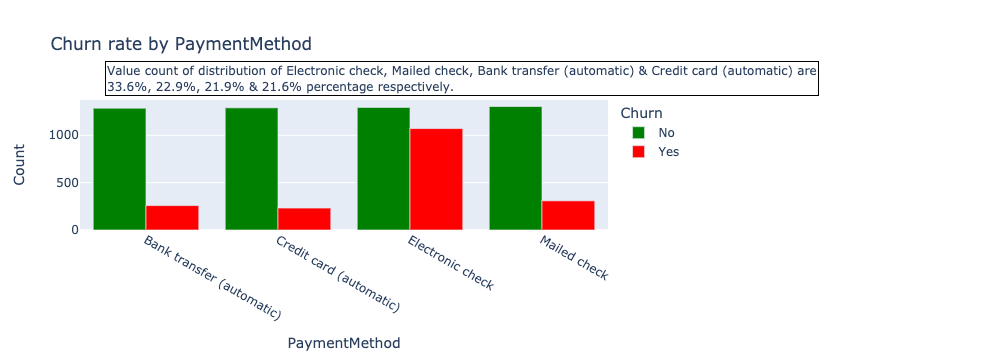

In [13]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

**Payment**:The shorter the contract the higher churn rate as those with longer plans face additional barriers when cancelling prematurely. This clearly explains the motivation for companies to have long-term relationship with their customers. Churn Rate is higher for the customers who opted for paperless billing, About 59.2% of the customers make paperless billing. Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types. Therefore, this segment may be further investigated if customers paying with electronic checks have any other thing in common. Automating the payment makes the customer more likely to retain in your platform (~30% difference). Electronic Check is the Largest Payment method and is the most churn.

### Explore Numeric features

After looking at the below histogram we can see that a lot of customers have been with the telecom company for just the first few month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company. This is supported with the contract graph that shows most of the customers are in the month to month contract.

In [7]:
# data_df.loc[data_df.Churn=='No','Churn'] = 0 
# data_df.loc[data_df.Churn=='Yes','Churn'] = 1

In [15]:
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', color_discrete_sequence=["green", "red"])
    fig.show()

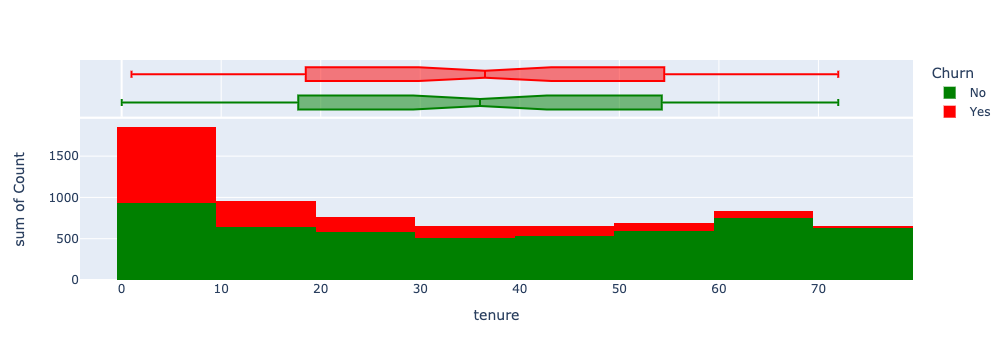

In [16]:
hist('tenure')

As a side note, in the dataset we have, Churn column is string with Yes/No values. We convert it to integer to make it easier to use in our analysis.

In [24]:
data_df.loc[data_df.Churn=='No','Churn'] = 0 
data_df.loc[data_df.Churn=='Yes','Churn'] = 1